# Data Analysis and Classic Machine Learning Techniques
***
# Table of Contents
1.   [Imports](#Imports)
2.   [Loading The Dataset](#Loading-The-Dataset)
3.   [Data Analysis](#Data-Analysis)
4.   [Data Pre-Processing](#Data-Pre-Processing)
4.   [Different Model Comparison](#Different-Model-Comparison)
5.   [Support Vector Machine](#Support-Vector-Machine)


# Imports

The necessary libraries are imported at this stage.

* pandas - Dataframe object is useful for data processing and analyses.
* sklearn - Provides a number of models, metrics and general functionality for machine learning.
* matplotlib - Provides plotting.

In [1]:
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import itertools
import numpy as np
#from google.colab import drive #Only needed on Colab
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, fbeta_score, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split, ParameterGrid
# Pretty display for notebooks
%matplotlib inline

# Loading The Dataset

In this section we load the dataset first from a single file.

Using **sklearn** functions, this dataset is split into the training and testing data, which are then exported as CSV files.

In [3]:
def split_data_SVM():
    """Splits dataset into training and testing dataframes
    and exports them as CSV files for later use in SVM"""

    all_data = pd.read_csv("Our Datasets/all data.csv", encoding="utf-8")

    train_pct_index = int(0.8 * len(all_data))
    all_data = shuffle(all_data)
    
    train, test = all_data[:train_pct_index], all_data[train_pct_index:]
    
    train.to_csv('Our Datasets/train80.csv', index = False)
    test.to_csv('Our Datasets/test20.csv', index = False)
split_data_SVM()

def split_data_CNN():
    """Splits dataset into training, testing and validation dataframes
     and exports them as CSV files for later use in CNN"""

    all_data = pd.read_csv("Our Datasets/all data.csv", encoding="utf-8")

    train_pct_index = int(0.9 * len(all_data))
    all_data = shuffle(all_data)

    train, test = all_data[:train_pct_index], all_data[train_pct_index:]


    train_pct_index = int(0.9 * len(train))
    all_data = shuffle(train)

    train, valid = train[:train_pct_index], train[train_pct_index:]

    train.to_csv('Our Datasets/train90.csv', index = False)
    test.to_csv('Our Datasets/test10.csv', index = False)
    valid.to_csv('Our Datasets/valid10.csv', index = False)
split_data_CNN()

In [2]:
#mount drive
#drive.mount("/content/drive")
#path_to_data = "" #"drive/MyDrive/Kaggle/"


train = pd.read_csv("Our Datasets/train80.csv", encoding="utf-8")
test = pd.read_csv("Our Datasets/test20.csv", encoding="utf-8")

#Check it loaded ok
#display(train.head(n=1))
#display(test.head(n=1))

In [3]:
print("\nTrain:\n")
print(train.head())
print(train.shape)

print("\nTest:\n")
print(test.head())
print(test.shape)


Train:

      Label  angle(X-axis, gravityMean  angle(Y-axis, gravityMean  \
0  SWIMMING                   1.578924                   0.237163   
1    LAYING                   1.108539                   1.718880   
2  SWIMMING                   1.682000                   0.308557   
3    LAYING                   2.980662                   1.695645   
4  STANDING                   1.939885                   2.445356   

   angle(Z-axis, gravityMean  angle(tBodyAccJerkMean, gravityMean)  \
0                   1.333778                              1.547561   
1                   0.488999                              2.100990   
2                   1.284208                              2.424341   
3                   1.469780                              2.527937   
4                   1.011908                              1.607197   

   angle(tBodyAccMean, gravityMean)  angle(tBodyGyroJerkMean, gravityMean)  \
0                          1.247954                               2.581173   

# Data Analysis

In this section analysis over the data is done to determine the processing steps necessary for the [next section](#Data-Pre-Processing).

## Check for Common Elements

The training and test data are merged using inner join to see if there is any overlapping data. The output is an empty data frame - containing only the list of different features - meaning that there are no intersections between the two.

In [4]:
merged = pd.merge(train, test, how='inner')
print(merged)

train2 = train[~train.isin(merged)].dropna()
print(train2)

        Label  angle(X-axis, gravityMean  angle(Y-axis, gravityMean  \
0      LAYING                   2.981145                   1.695085   
1   STAIRS UP                   1.563974                   3.127073   
2      LAYING                   2.956217                   1.659442   
3      LAYING                   2.955511                   1.660354   
4   STAIRS UP                   1.545227                   3.037876   
..        ...                        ...                        ...   
81     LAYING                   0.825656                   1.504225   
82     LAYING                   2.991691                   1.699418   
83     LAYING                   1.110229                   1.718707   
84     LAYING                   1.109152                   1.719605   
85  STAIRS UP                   1.554756                   3.027012   

    angle(Z-axis, gravityMean  angle(tBodyAccJerkMean, gravityMean)  \
0                    1.469852                              2.655170   
1    

## Shuffle the data

In [5]:
train = shuffle(train)
test = shuffle(test)

## Check for null values in rows

Checks each field in the training and testing data to ensure that there are no features with *null* or *inf* values which may have emerged during the feature extraction stage.

In [6]:
print("Any missing sample in training set:", train.isnull().values.any())
print("Any missing sample in test set:", test.isnull().values.any(), "\n")

Any missing sample in training set: False
Any missing sample in test set: False 



## Label Distribution

### Label Distribution in a Pie Chart

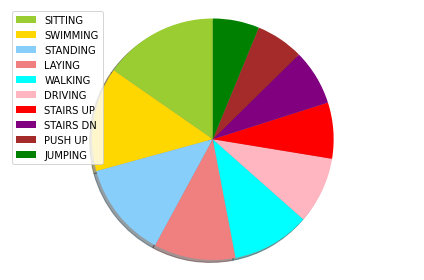

In [7]:
# Visualizing Training Activity Distribution
temp = train["Label"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'cyan','lightpink', 'red', 'purple', 'brown', 'green']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

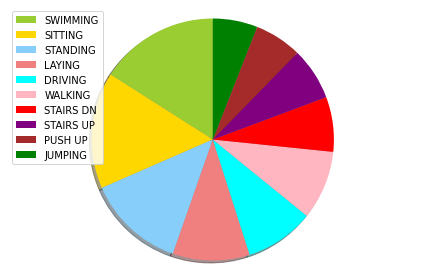

In [8]:
# Visualizing Test Activity Distribution
temp = test["Label"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'cyan','lightpink', 'red', 'purple', 'brown', 'green']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

### Label Distribution in a Column Format

This shows the number of different labelled activities in both the training and test datasets

In [9]:
train_outcome = pd.crosstab(index=train["Label"], columns="count")
test_outcome = pd.crosstab(index=test["Label"], columns="count")
print("Training Data")
print(train_outcome)
print("\nTest Data")
print(test_outcome)

Training Data
col_0      count
Label           
DRIVING      582
JUMPING      404
LAYING       711
PUSH UP      417
SITTING      997
STAIRS DN    485
STAIRS UP    488
STANDING     834
SWIMMING     906
WALKING      679

Test Data
col_0      count
Label           
DRIVING      150
JUMPING       97
LAYING       167
PUSH UP      103
SITTING      253
STAIRS DN    119
STAIRS UP    114
STANDING     213
SWIMMING     260
WALKING      150


# Data Pre-Processing

The dataset only requires a small number of pre-processing mainly, splitting the sets into X and y variables, categorical
variable encoding (for the label), and scaling.

The *activity* and *subject* columns are removed from the training and test data. **Y_train_label** and **Y_test_label** are the classifications of the activity of each row in the respective dataframes.

In [10]:
X_train = pd.DataFrame(train.drop(['Label'],axis=1))
Y_train_label = train.Label.values.astype(object)
X_test = pd.DataFrame(test.drop(['Label'],axis=1))
Y_test_label = test.Label.values.astype(object)

print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# Transforming non numerical labels into numerical labels
encoder = preprocessing.LabelEncoder()

# encoding train labels
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

# encoding test labels
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

#Total Number of Continuous features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of Continuous Features:",num_cols.size)

#names_of_predictors = list(X_train.columns.values) #Names of each feature

# Scaling the Train and Test feature set
# Because - values and classification
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #fit_transform is performed on training data
X_test_scaled = scaler.transform(X_test) #transform is performed on test data

Dimension of Train set (6503, 589)
Dimension of Test set (1626, 589) 

Number of Continuous Features: 589


# Different Model Comparison

In this step we compare 4 classic machine learning models.

* Gaussian Naïve Bayes
* AdaBoost
* Stochastic Gradient Descent
* Support Vector Classifier

Using an iterative function, each classifier was trained using the default parameters and training data. Then, the model was tested and the accuracy, f-beta, precision and recall scores were outputted.

In [10]:
clf_A = GaussianNB()
clf_B = AdaBoostClassifier(random_state=0)
clf_C = SGDClassifier(random_state=0)
clf_D = SVC(random_state=0)

learners = {}
learners["Gaussian Naïve Bayes"] = clf_A
learners["AdaBoost"] = clf_B
learners["Stochastic Gradient Descent Classifier"] = clf_C
learners["Support Vector Machine"] = clf_D

def train_predict(learners, X_train, y_train, X_test, y_test):
    """Trains each classifier in learners and then tests it using a dataset"""

    for learner in learners:
        print("Learner:", learner,"\n------")
        print("Training Data")
        start = time()
        learners[learner].fit(X_train, y_train)
        end = time()
        print("Time taken:", end-start, "seconds")

        print("Testing Data")
        start = time()
        predictions_test = learners[learner].predict(X_test)
        end = time()
        print("Time taken:", end-start, "seconds")


        print("\nAccuracy Score")
        print(accuracy_score(y_test,predictions_test))

        print("\nBeta Score")
        print(fbeta_score(y_test,predictions_test,beta=0.5,average='weighted'))

        print("\nPrecision Score")
        print(precision_score(y_test, predictions_test, average='weighted'))

        print("\nRecall Score")
        print(recall_score(y_test, predictions_test, average='weighted'),'\n')

train_predict(learners, X_train_scaled, Y_train, X_test_scaled, Y_test)

Learner: Gaussian Naïve Bayes 
------
Training Data
Time taken: 0.08299970626831055 seconds
Testing Data
Time taken: 0.060007333755493164 seconds

Accuracy Score
0.7134071340713407

Beta Score
0.7251547122924897

Precision Score
0.7554665458873527

Recall Score
0.7134071340713407 

Learner: AdaBoost 
------
Training Data
Time taken: 19.042211055755615 seconds
Testing Data
Time taken: 0.10700106620788574 seconds

Accuracy Score
0.4065190651906519

Beta Score
0.2519951943796828

Precision Score
0.42890301327489144

Recall Score
0.4065190651906519 

Learner: Stochastic Gradient Descent Classifier 
------
Training Data
C:\Users\Jake Sant\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Time taken: 1.4709975719451904 seconds
Tes

As can be seen from the above metrics, SVM is quite clearly the most accurate classifier of the four, and it is for that reason that we will use it as one of the main classifiers for the group practical task

# Support Vector Classifier

There are a number of different parameters we can apply to SVC in order to obtain the best results possible. These different parameters were passed through a Grid Search model, which applies all of them to train various SVCs.

In [11]:
clf = SVC(random_state=0)

parameters =    {
                "kernel": ['poly', 'rbf', 'sigmoid'],
                "C": [100, 50, 10, 1, 0.1, 0.01],
                "gamma": ['scale']
                }

scorer = make_scorer(fbeta_score, beta=0.5,average='weighted')
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train_scaled,Y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
clf.fit(X_train_scaled, Y_train)
# Make predictions using the unoptimised and optimised models
predictions = clf.predict(X_test)
best_predictions = best_clf.predict(X_test_scaled)

# Report the before-and-afterscores
print("Unoptimised model\n------")
print("Accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test, predictions)))
print("F-score on the testing data: {:.4f}".format(fbeta_score(Y_test, predictions, beta = 0.5,average='weighted')))
print("Precision score on the testing data: {:.4f}".format(precision_score(Y_test, predictions, average='weighted')))
print("Recall score on the testing data: {:.4f}".format(recall_score(Y_test, predictions, average='weighted')))
print("\nOptimised Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test, best_predictions, beta = 0.5,average='weighted')))
print("Final precision score on the testing data: {:.4f}".format(precision_score(Y_test, best_predictions, average='weighted', zero_division=0)))
print("Final recall score on the testing data: {:.4f}".format(recall_score(Y_test, best_predictions, average='weighted', zero_division=0)))

Unoptimised model
------
Accuracy score on the testing data: 0.0597
F-score on the testing data: 0.0044
Precision score on the testing data: 0.0036
Recall score on the testing data: 0.0597

Optimised Model
------
Final accuracy score on the testing data: 0.9846
Final F-score on the testing data: 0.9850
Final precision score on the testing data: 0.9853
Final recall score on the testing data: 0.9846
C:\Users\Jake Sant\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


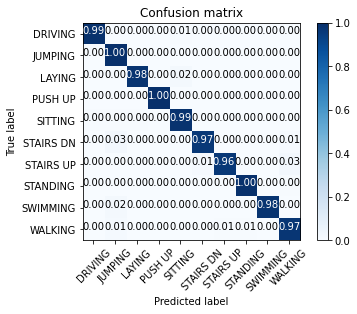

In [12]:
#Confusion Matrix maps out the predicted label given to the data with the actual label
#Helps us check the rate of true/false positives and true/false negatives
#parameters are the true labels, and the predicted labels

# https://sklearn.org/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cnf_matrix = confusion_matrix(Y_test, best_predictions)
np.set_printoptions(precision=2)

classes =    {
                        "DRIVING": 0,
                        "JUMPING": 1,
                        "LAYING": 2,
                        "PUSH UP": 3,
                        "SITTING": 4,
                        "STAIRS DN": 5,
                        "STAIRS UP": 6,
                        "STANDING": 7,
                        "SWIMMING": 8,
                        "WALKING": 9
                    }

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,title='Confusion matrix')


The parameters which gave the highest accuracy scores in the gridsearch are then outputted.

In [16]:
print("The best parameters were:", grid_fit.best_params_)


The best parameters were: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf', 'tol': 0.001}
